# Class 14: Writing functions

In this notebook we will continuing learning some of the fundamentals of Python that we skipped over in the beginning of the semester. This material will be useful for analyzing data, and more generally for any programming you do in the future. 

## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [3]:
import YData

# YData.download.download_class_code(14)       
# YData.download.download_class_code(14, TRUE) # get the code with the answers 

YData.download_data('daily_bike_totals.csv')

There are also similar functions to download the homework:

In [264]:
# YData.download.download_homework(6)  # download the homework 

If you are using google colabs, you should also uncomment and run the code below install the YData package and to mount the your google drive.

In [265]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

## 1. Quick warm up exercises on for loops

As we discussed last class, loops allow us to repeat a process many times. They are particularly useful in conjuction with lists to process and store multiple values. 

Let's start with a quick warm up exercise on for loops. The code below loads our bike data from 2014 and can creates two lists which are:

- `weekday`: A list of Booleans specifying whether a day is a weekday
- `num_trips`: A list containing how many trips were taken on each day


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

bikes = pd.read_csv("daily_bike_totals.csv", parse_dates = [0])
bikes_2014 = bikes.query("date > '2013-12-31'").query("date < '2015-01-01'")

weekday = bikes_2014["weekday"].to_list()
num_trips = bikes_2014["trips"].to_list()

print(weekday[0:5])
print(num_trips[0:5])

[True, True, True, False, False]
[6059, 8600, 1144, 2292, 2678]


### Warm up exercise 1.1

Please use a for loop to a list called `weekday_trips` which contains the number of trips that occurred only on weekdays. 


In [8]:
weekday_trips = []

for i in range(len(weekday)):

    if weekday[i]:
        weekday_trips.append(num_trips[i])


len(weekday_trips)

261

### Warm up exercise 1.2

Now add to your code so that you also create a list called `weekend_trips` that contain the number of trips that occured on all weekend. 

Once you have created these lists create side-by-side boxplots to compare the number of trips taken on weekdays and weekends. 


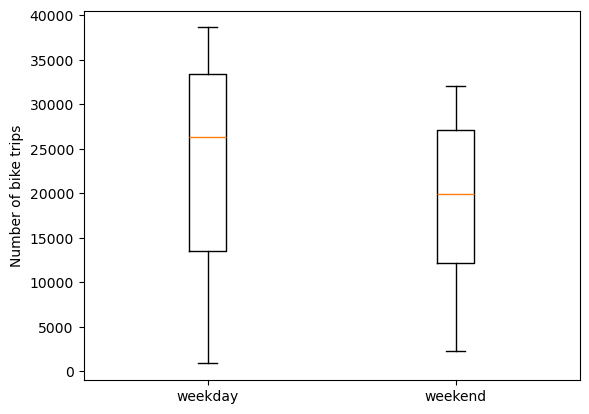

In [13]:

weekday_trips = []
weekend_trips = []


for i in range(len(weekday)):

    if weekday[i]:
        weekday_trips.append(num_trips[i])
    else:
        weekend_trips.append(num_trips[i])


# plot the results

plt.boxplot([weekday_trips, weekend_trips], labels = ["weekday", "weekend"]);
plt.ylabel("Number of bike trips");


## Functions!

We have already used many functions in this class that are built into Python or are imported from different modules/packages. 

Let's now write some new functions outselves! 


In [286]:
# Write a function that doubles a value
def double(x):
    return x * 2

In [287]:
# Try the function out 1
double(7)

14

In [288]:
# Try the function out 2
double(15/3)

10.0

In [289]:
# Try the function out 3
my_number = 12
double(my_number)

24

In [290]:
# Try the function out 4
double(my_number / 8)

3.0

In [291]:
# Will this work?
double(np.array([3, 4, 5]))

array([ 6,  8, 10])

In [292]:
# Will this work? 
double('data')

'datadata'

In [293]:
# What about this? 
double(True)

2

In [364]:
# "local scope"
# x

17

In [295]:
# Let's set x to 17 
x = 17

In [296]:
# Double 2
double(2)

4

In [297]:
# Did x change?
x

17

In [298]:
# What if we double x? 
double(x)

34

In [299]:
# Did x change?
x

17

## Function extras: docstrings

When writing functions that will be used by other people (or your future self) it is important to write some documentation describing how your function works. In Python, this type of documentation is called a "docstring". The text in a docstring is in triple quotes which allows for multi-line comments.

There are a number of [convensions](https://peps.python.org/pep-0257/) surrounding on how to write a docstring, including: 

- The doc string line should begin with a capital letter and end with a period.
- The first line should be a short description.
- If there are more lines in the documentation string, the second line should be blank, visually separating the summary from the rest of the description.
- The following lines should be one or more paragraphs describing the object’s calling conventions, its side effects, etc.


In [300]:
def double(x):
    """Take a number and doubles it.
    
    Parameters:
    x (int): A number that should be doubled
    
    Returns:
    int: The numbers that is doubled
    
    """
    return x * 2

In [301]:
# View the docstring
? double

Signature:  double(x)
Docstring:
Take a number and doubles it.

Parameters:
x (int): A number that should be doubled

Returns:
int: The numbers that is doubled
File:      /var/folders/cf/6n8xrbx543d56lbd_nvknlv1jrtn3q/T/ipykernel_57092/4122166559.py
Type:      function

### Multiple arguments and default values

We can also write functions that take multiple arguments and we can set particular arguments to have default values that are used if no value for an argument is given. 

Let's explore this...



In [302]:
# Define powerit function 
def powerit(x, pow):
    return x**pow

In [303]:
# Use the function 
powerit(2, 3)

8

In [304]:
# Try the function with a single argument
#powerit(2)

In [305]:
# Set a default argument value

def powerit(x, pow = 3):
    return x**pow

In [306]:
# Try the new function with a single argument
powerit(2)

8

In [307]:
# Try the function with two arguments
powerit(2, 5)

32

### Multiple return values and tuples

We can also write funciton that can return multiple values. We can do this by returning a tuple. 

Recall, tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 

In [308]:
# Recall tuples
my_tuple = (10, 20, 30)

my_tuple

(10, 20, 30)

In [309]:
# We can access elements of the tuple using square brackets (the same as lists)
my_tuple[1]

20

In [310]:
# Unlike a list, we can't reassign values in a tuple 
#my_tuple[1] = 50

In [311]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3

30

Let's create a function `power23(x)` that returns a number squared and a number cubed. 

In [312]:
# Create a function that returns a value squared and cubed

def sqr_and_cube(x):
    
    return (x**2, x**3)

In [313]:
sqr_and_cube(2)

(4, 8)

In [314]:
# We can use "tuple unpacking" to assign both outputs to different names
squared, cubed = sqr_and_cube(2)  

print(squared)
print(cubed)

4
8


### Passing functions as input arguments

We can also pass functions as input arguments to other functions. Let's explore this...

In [315]:
def compute_on_my_array(stat_function):
    
    my_array = np.array([21, 44, 54, 23, 25, 32])
    
    calculated_val = stat_function(my_array)
    
    return calculated_val

In [316]:
# Apply the np.mean function to my_array
compute_on_my_array(np.mean)

33.166666666666664

In [317]:
# Apply the np.sum function to my_array
compute_on_my_array(np.sum)

199

In [318]:
# Apply power23 to my_array
compute_on_my_array(sqr_and_cube)

(array([ 441, 1936, 2916,  529,  625, 1024]),
 array([  9261,  85184, 157464,  12167,  15625,  32768]))

## Text manipulation

A large part of Data Scientists' time is spent cleaning data, and a large part of data cleaning consists of manipulating text.

Let's explore some of the functions that are built into Python for manipulating strings of text. 


### 1. Changing capitalization

One of the most basic things we can do is to change the capitalization of a piece of text. 

One case where this comes up is when one is merging two DataFrames that have the same key values but the values have different capitalization. For example, one might have two DataFrames that have a column that has the names of different countries, but in one DataFrame the country names are capitalized and in the other they are not. 

Python strings have a number of methods to change the capitalization of words including: 

- `capitalize()`: Converts the first character to upper case
- `lower()`: Converts a string into lower case
- `upper()`: Converts a string into upper case
- `title()`: Converts the first character of each word to upper case
- `swapcase()`: Swaps cases, lower case becomes upper case and vice versa

Let's explore these methods by manipulating this [quote](https://www.brainyquote.com/topics/yale-quotes) from [Herman Melville](https://en.wikipedia.org/wiki/Herman_Melville): "a whale ship was my Yale College and my Harvard". 


In [319]:
melville_quote = "a whale ship was my Yale College and my Harvard"

melville_quote


'a whale ship was my Yale College and my Harvard'

In [320]:
# Capitalize the first letter 

melville_quote.capitalize()

'A whale ship was my yale college and my harvard'

In [321]:
# Convert all letters to lower case

melville_quote.lower()

'a whale ship was my yale college and my harvard'

In [322]:
# Convert all letters to upper case

melville_quote.upper()

'A WHALE SHIP WAS MY YALE COLLEGE AND MY HARVARD'

In [323]:
# Make the first letter of each word capitalized

melville_quote.title()

'A Whale Ship Was My Yale College And My Harvard'

In [324]:
# Make uppercase lowercase, and lowercase uppercase

melville_quote.swapcase()


'A WHALE SHIP WAS MY yALE cOLLEGE AND MY hARVARD'

### 2. String padding

Often we want to remove extra spaces (called "white space") from the front or end of a string. Or conversely, sometimes we want to add extra spaces to make a set of strings the same length (this is known as "string padding"). 

Python strings have a number of methods that can pad/trim strings including: 

- `strip()`: Returns a trimmed version of the string (i.e., with no leading or trailing white space). 
- `rstrip()`: Returns a right trim version of the string
- `lstrip()`: Returns a left trim version of the string

- `center(num)`: Returns a centered string (with equal padding on both sides)
- `ljust(num)`: Returns a left justified version of the string
- `rjust(num)`: Returns a right justified version of the string

- `zfill(num)`: Fills the string with a specified number of 0 values at the beginning

Let's use a modified version of Melville quote to explore this


In [325]:
melville_quote2 = "    a whale ship was my Yale College and my Harvard   "
melville_quote2

'    a whale ship was my Yale College and my Harvard   '

In [326]:
# Strip the white space
melville_quote2.strip()

'a whale ship was my Yale College and my Harvard'

In [327]:
# Strip just the left the white space
melville_quote2.lstrip()

'a whale ship was my Yale College and my Harvard   '

In [328]:
# Center the quote by padding with white space 
#. to have a total of 70 characters
melville_quote.center(70)


'           a whale ship was my Yale College and my Harvard            '

In [329]:
# Make a number have leading 0's 
# Q: Why/when is this useful?

"7".zfill(3)


'007'

### 3. Checking string properties

There are also many functions to check properties of strings including:

- `isalnum()`: Returns True if all characters in the string are alphanumeric
- `isalpha()`: Returns True if all characters in the string are in the alphabet
- `isnumeric()`: Returns True if all characters in the string are numeric

- `isspace()`: Returns True if all characters in the string are whitespaces

- `islower()`: Returns True if all characters in the string are lower case
- `isupper()`:Returns True if all characters in the string are upper case
- `istitle()`: Returns True if the string follows the rules of a title

Let's test some of these methods out...


In [330]:
# Checking if a string is all letters

"abc".isalpha()

"abc123".isalpha()


False

In [331]:
# Checking if a string is all numbers

"123".isnumeric()

True

In [332]:
# Checking if a string only contains spaces

"   ".isspace()

"\n".isspace()   # also works for new line characters \n, and tables \t

True

In [333]:
# Checking if a string is upper case

"I AM NOT YELLILNG!!!".isupper()

True

### 4. Splitting and joining strings

There are several methods that can help us join strings that are contained into a list into a single string, or conversely, parse a single string into a list of strings. These include: 

- `split(separator_string)`: Splits the string at the specified separator, and returns a list
- `splitlines()`: Splits the string at line breaks and returns a list

- `join(a_list)`: Converts the elements of an iterable into a string

In [334]:
# Split the Melville quote at each space into a list

melville_quote.split(" ")

['a', 'whale', 'ship', 'was', 'my', 'Yale', 'College', 'and', 'my', 'Harvard']

In [365]:
# Split a string at each line into a list

poem = """Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is also great
And would suffice."""

poem

'Some say the world will end in fire,\nSome say in ice.\nFrom what I’ve tasted of desire\nI hold with those who favor fire.\nBut if it had to perish twice,\nI think I know enough of hate\nTo say that for destruction ice\nIs also great\nAnd would suffice.'

In [ ]:
# Split the poem into a list 

poem.splitlines()


In [336]:
# Join a string together

a_list = ["A", "Whale", "of", "a", "Tale"]

" ".join(a_list)



'A Whale of a Tale'

### 5. Finding and replacing substrings

Some methods for locating a substring within a larger string include: 

- `count(substring)`: Returns the number of times a specified value occurs in a string
- `rfind(substring)`: Searches the string for a specified value and returns the last position of where it was found. (also see `rindex()`)

- `startswith(substring)`: Returns true if the string starts with the specified value
- `endswith(substring)` : Returns true if the string ends with the specified value

- `replace(original_str, replacement_str)`: Replace a substring with a different string. 

In [337]:
# How many times does the word "my" occur in the Melville quote? 
melville_quote.count("my")

2

In [338]:
# At what index does the first instance of "my" occur?
melville_quote.index("my")

17

In [339]:
# Does the quote start with "a"?
melville_quote.startswith("a")

True

In [340]:
# Does the quote end with Harvard? 

melville_quote.endswith("Harvard")

True

In [341]:
# Replace a substring
melville_quote.replace("Harvard", "that other school that is almost as good")

'a whale ship was my Yale College and my that other school that is almost as good'

### 6. Filling in strings with particular values

There are a number of ways to fill in strings parts of a string with particular values. Perhaps the most useful is to use "f strings", which have the following syntax such as: 

`f"my string {value_to_fill} will be filled in"`.

Where the value of the variable `value_to_fill` will be filled into the string. 

Let's try it out... 


In [342]:
# Let's use an f-string

person = "Herman Melville"

f"Mr. {person} liked writing about whales."



'Mr. Herman Melville liked writing about whales.'

In [366]:
# We can also do formatting with f-strings

amount = 123000
f"${amount:,.2f} is a lot of money!"

'$123,000.00 is a lot of money!'

### Example: string processing on webpages

As an example, let's do some string processing on webpages!


In [344]:
# Download a webpage and save it as a file called politics.html

import requests

url = 'https://www.foxnews.com/politics/white-house-doctor-says-biden-fit-serve-president'
r = requests.get(url, allow_redirects=True)
open('politics.html', 'wb').write(r.content)



223470

In [345]:
# Read in the file as a string called webpage_string
file = open('politics.html', 'r', encoding="utf8")
webpage_string = file.read()

# Look at the first 300 characters 
webpage_string[0:300]

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head>\n    <title>White House doctor says Biden &#x27;fit to serve&#x27; as president: &#x27;Healthy, vigorous, 80-year-old&#x27; | Fox News</title><meta data-n-head="ssr" http-equiv="X-UA-Comp'

In [346]:
# Replace a word on the webpage

webpage_updated = webpage_string.replace("Biden", "Sleepy Joe")


In [347]:
# Write updated string to a file
text_file = open("updated_politics.html", "w", encoding="utf8")
n = text_file.write(webpage_updated)
text_file.close()

<img src = "https://i1.sndcdn.com/avatars-000316245474-0yp1vu-t500x500.jpg">

## Regular expressions

Regular expressions are string with special characters that allow you find more complex patterns in pieces of text.

To use regular expressions in Python we can use the `re` module. 

If we convert the output of the `re.match()` function to a Boolean (i.e., `bool(re.match())`, we can tell if a piece of text contains a particular substring. 

Let's run to test to check if:

1. Our Melville quote contains the letter "a"
2. Our Melville quote contains the letter "z"


In [348]:
import re

# Check if our Melville quote contains/starts with the letter a
print(bool(re.match("a", melville_quote)))


True


In [349]:
# Check if our Melville quote contains/starts with the letter z
print(bool(re.match("z", melville_quote)))


False


A few special characters that can be used in regular expressions are:
- `^` means the start of a word 
- `$` means the end of a word 
- `[Pp]` means P or p

In [350]:
# Check if our Melville quote starts with an upper of lower case A
print(bool(re.match("[aA]", melville_quote)))


True


In [351]:
# Check if our Melville quote starts with a vowel
print(bool(re.match("^[aeiouAEIOU]", melville_quote)))

True


In [352]:
# Check if our Melville quote does not starts with a vowel
print(bool(re.match("^[^aeiouAEIOU]", melville_quote)))

False


In [353]:
# We can use the period . to match any one character

bool(re.match("m.ss", "miss"))   # miss, mass, mess


True

In [354]:
# * means repeat the previous character 0 or more times
bool(re.match("xy*z", "xz"))   # xz, xyz, xyyz, xyyyz, ...

True

In [355]:
# + means repeat the previous character 1 or more times
bool(re.match("xy+z", "xz"))   # xyz, xyyz, xyyyz, ...

False

In [356]:
# Will the following match?

bool(re.match(".*a.*e",  "pineapple"))  


True

#### Example: matching phone numbers

In [357]:
phone_strings = [ "apple", 
                 "219 733 8965", 
                 "329-293-8753", 
                 "Work: 579-499-7527",
                 "Home: 543.355.3679"]

phone_strings

['apple',
 '219 733 8965',
 '329-293-8753',
 'Work: 579-499-7527',
 'Home: 543.355.3679']

In [358]:
# A regular expression to match phone numners

phone_expression = ".*([2-9][0-9]{2})[- .]([0-9]{3})[- .]([0-9]{4})"


In [359]:
# Test which phone_strings are valid phone numbers

for i in range(len(phone_strings)):
    print(bool(re.match(phone_expression,  phone_strings[i])))


False
True
True
True
True


#### Escape characters

In [360]:
# Does not match because nothing after the end of a string
bool(re.match(".*$100", "Joanna has $100 and Chris has $0"))

False

In [361]:
# using escape characters can help
bool(re.match(".*\\$100", "Joanna has $100 and Chris has $0"))

True

#### Special characters

Other special characters are also designated by using a double slash first

`\s`   space

`\n`   new line     or also   `\r`

`\t`   tab


In [362]:
# Does the melville_quote contain new lines?
bool(re.match(".*\n", melville_quote))

False

In [363]:
# Does the poem contain new lines?
bool(re.match(".*\n", poem))

True